In [3]:
#!wget -nc https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -O ../adv_manhole/models/mm_segmentation/weights/pspnet_r50-d8_512x1024_40k_cityscapes.pth
!mim download mmsegmentation --config pspnet_r50-d8_4xb2-80k_cityscapes-512x1024 --dest ../adv_manhole/models/mm_segmentation/weights/

processing pspnet_r50-d8_4xb2-80k_cityscapes-512x1024...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 MiB 16.9 MB/s eta 0:00:0000:0100:01
Successfully downloaded pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth to /home/islab-ai/pentesting/Andro-Dev/manhole-dev/adversarial-manhole/adv_manhole/models/mm_segmentation/weights
Successfully dumped pspnet_r50-d8_4xb2-80k_cityscapes-512x1024.py to /home/islab-ai/pentesting/Andro-Dev/manhole-dev/adversarial-manhole/adv_manhole/models/mm_segmentation/weights


In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import sys

from torchvision import transforms
from PIL import Image

sys.path.append("..")
from adv_manhole.models import load_models, ModelType

The console stream is logged into /root/sg_logs/console.log


[2024-06-10 06:22:47] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2024-06-10 06:22:55] INFO - instantiator.py - Created a temporary directory at /tmp/tmplejdrwbn
[2024-06-10 06:22:55] INFO - instantiator.py - Writing /tmp/tmplejdrwbn/_remote_module_non_scriptable.py


[2024-06-10 06:22:56,288] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


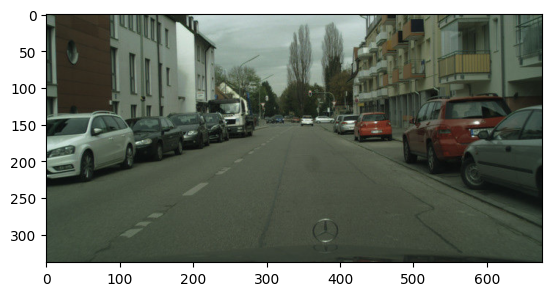

In [2]:
url = "https://cdn-media.huggingface.co/Inference-API/Sample-results-on-the-Cityscapes-dataset-The-above-images-show-how-our-method-can-handle.png"
cityscape_img = np.array(Image.open(requests.get(url, stream=True).raw))

plt.imshow(cityscape_img)
plt.show()

In [3]:
model_instance = load_models(
    model_type=ModelType.MM,
    model_name='pspnet_r50-d8_4xb2-80k_cityscapes-512x1024'
)

/usr/local/lib/python3.8/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.8/dist-packages/mmseg/models/losses/cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /home/islab-ai/pentesting/Andro-Dev/manhole-dev/adversarial-manhole/adv_manhole/models/mm_segmentation/weights/pspnet_r50-d8_512x1024_80k_cityscapes_20200606_112131-2376f12b.pth


In [4]:
original_shape = cityscape_img.shape[:2]
print(original_shape)

(338, 676)


In [5]:
predicted_image = model_instance.predict(
    tensor_images=cityscape_img,
    original_shape=original_shape
)

In [6]:
predicted_image

<SegDataSample(

    META INFORMATION
    ori_shape: (338, 676)
    img_path: None
    scale_factor: (3.029585798816568, 3.029585798816568)
    img_shape: (1024, 2048)

    DATA FIELDS
    seg_logits: <PixelData(
        
            META INFORMATION
        
            DATA FIELDS
            data: tensor([[[-3.7682e-01, -4.1974e-01, -6.5859e-01,  ..., -4.5625e-03,
                           2.6402e-01,  3.1227e-01],
                         [-3.8706e-01, -4.2932e-01, -6.6450e-01,  ..., -3.3197e-02,
                           2.2594e-01,  2.7250e-01],
                         [-4.4408e-01, -4.8267e-01, -6.9743e-01,  ..., -1.9256e-01,
                           1.4007e-02,  5.1118e-02],
                         ...,
                         [ 4.8737e+00,  4.8938e+00,  5.0059e+00,  ...,  5.2958e+00,
                           5.1554e+00,  5.1302e+00],
                         [ 4.6644e+00,  4.6866e+00,  4.8102e+00,  ...,  5.0225e+00,
                           4.8801e+00,  4.8546e+00],

In [7]:
model_instance.plot(
    image=cityscape_img,
    prediction=predicted_image
)